In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.rcParams["figure.figsize"] = (20,10)

In [6]:
df = pd.read_csv(r"C:\Users\kesav\OneDrive\Desktop\ML\uae_real_estate_2024.csv")
df.head()

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...
1,Full Sea View | Beach Life | Brand New Residence,"La Vie, Jumeirah Beach Residence, Dubai",3,2,2024-08-13T05:45:16Z,Residential for Sale,7200000,True,sell,1410 sqft,YES,"Apartment for sale in La Vie, Jumeirah Beach R..."
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324 sqft,NO,Treo Homes is very pleased to be bringing to t...
3,2BR+Study | Near Pool and Park | Private,"Springs 15, The Springs, Dubai",3,2,2024-08-15T06:07:22Z,Residential for Sale,2999999,True,sell,1647 sqft,NO,2 Bedrooms + Study | Near Pool &amp; Park | Pr...
4,Vacant | Well Maintained | Area Expert,"Noor Townhouses, Town Square, Dubai",3,3,2024-08-09T08:28:59Z,Residential for Sale,2449999,True,sell,2105 sqft,NO,-Type 1\n-3 Bed+Maid\n-Close To Amenities\n-BU...


In [7]:
df.shape

(5058, 12)

In [8]:
df.groupby('type')['type'].agg('count')

type
Residential for Sale    5058
Name: type, dtype: int64

In [9]:
df2 = df.drop(['title', 'addedOn', 'type', 'verified', 'priceDuration', 'furnishing', 'description'], axis = 'columns')
df2.head()

,displayAddress,bathrooms,bedrooms,price,sizeMin
0,"Binghatti Canal, Business Bay, Dubai",3,2,2500000,1323 sqft
1,"La Vie, Jumeirah Beach Residence, Dubai",3,2,7200000,1410 sqft
2,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,3600000,2324 sqft
3,"Springs 15, The Springs, Dubai",3,2,2999999,1647 sqft
4,"Noor Townhouses, Town Square, Dubai",3,3,2449999,2105 sqft


In [10]:
df2.rename(columns = {'displayAddress':'location',
                     'sizeMin':'sqft',
                     'bedrooms':'bhk'}, inplace = True)
df2.head()

,location,bathrooms,bhk,price,sqft
0,"Binghatti Canal, Business Bay, Dubai",3,2,2500000,1323 sqft
1,"La Vie, Jumeirah Beach Residence, Dubai",3,2,7200000,1410 sqft
2,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,3600000,2324 sqft
3,"Springs 15, The Springs, Dubai",3,2,2999999,1647 sqft
4,"Noor Townhouses, Town Square, Dubai",3,3,2449999,2105 sqft


In [11]:
df2.isnull().sum()

location       0
bathrooms    120
bhk          123
price          0
sqft           0
dtype: int64

In [12]:
df2=df2.dropna()

In [13]:
df2.isnull().sum()

location     0
bathrooms    0
bhk          0
price        0
sqft         0
dtype: int64

In [14]:
df2.shape

(4933, 5)

In [15]:
df2.sqft.unique()

array(['1323 sqft', '1410 sqft', '2324 sqft', ..., '5239 sqft',
       '4505 sqft', '3813 sqft'], dtype=object)

In [16]:
df2['squarefeet'] = df2['sqft'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
df2.head()

,location,bathrooms,bhk,price,sqft,squarefeet
0,"Binghatti Canal, Business Bay, Dubai",3,2,2500000,1323 sqft,1323
1,"La Vie, Jumeirah Beach Residence, Dubai",3,2,7200000,1410 sqft,1410
2,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,3600000,2324 sqft,2324
3,"Springs 15, The Springs, Dubai",3,2,2999999,1647 sqft,1647
4,"Noor Townhouses, Town Square, Dubai",3,3,2449999,2105 sqft,2105


In [18]:
df3 = df2.drop(['sqft'], axis = 'columns')
df3.head()

,location,bathrooms,bhk,price,squarefeet
0,"Binghatti Canal, Business Bay, Dubai",3,2,2500000,1323
1,"La Vie, Jumeirah Beach Residence, Dubai",3,2,7200000,1410
2,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,3600000,2324
3,"Springs 15, The Springs, Dubai",3,2,2999999,1647
4,"Noor Townhouses, Town Square, Dubai",3,3,2449999,2105


In [19]:
print(df3['bhk'].unique())
print(df3['bathrooms'].unique())

['2' '4' '3' '5' '1' 'studio' '7' '6' '7+']
['3' '7' '4' '1' '5' '2' '6' '7+' 'none']


In [20]:
df3['bhk'] = df3['bhk'].replace({'studio': 1, '7+':8})
df3['bathrooms'] = df3['bathrooms'].replace({'7+': 8, 'none': 0})
df3['bathrooms'] = pd.to_numeric(df3['bathrooms'], errors='coerce').fillna(0).astype(int)
df3['bhk'] = pd.to_numeric(df3['bhk'], errors='coerce').fillna(0).astype(int)

In [21]:
df3.dtypes

location      object
bathrooms      int32
bhk            int32
price          int64
squarefeet     int64
dtype: object

In [22]:
df3.head()

,location,bathrooms,bhk,price,squarefeet
0,"Binghatti Canal, Business Bay, Dubai",3,2,2500000,1323
1,"La Vie, Jumeirah Beach Residence, Dubai",3,2,7200000,1410
2,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,3600000,2324
3,"Springs 15, The Springs, Dubai",3,2,2999999,1647
4,"Noor Townhouses, Town Square, Dubai",3,3,2449999,2105


In [23]:
df4 = df3.copy()
df4['Price_per_sqft'] = df4['price']/df4['squarefeet']
df4.head()

,location,bathrooms,bhk,price,squarefeet,Price_per_sqft
0,"Binghatti Canal, Business Bay, Dubai",3,2,2500000,1323,1889.644747
1,"La Vie, Jumeirah Beach Residence, Dubai",3,2,7200000,1410,5106.382979
2,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,3600000,2324,1549.053356
3,"Springs 15, The Springs, Dubai",3,2,2999999,1647,1821.493018
4,"Noor Townhouses, Town Square, Dubai",3,3,2449999,2105,1163.895012


In [24]:
len(df4.location.unique())

1841

In [25]:
df4.location = df4.location.apply(lambda x: x.strip())

In [26]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Hayyan, Sharjah                                               40
Verdana Residence, Dubai Investment Park (DIP), Dubai         31
Al Zaheya Gardens, Al Zahya, Ajman                            27
Al Yasmeen 1, Al Yasmeen, Ajman                               26
AZIZI Riviera, Meydan One, Meydan, Dubai                      25
                                                              ..
Jewelz by Danube, Arjan, Dubai                                 1
Jenna Main Square 1, Jenna Main Square, Town Square, Dubai     1
Jebel Ali Village, Jebel Ali, Dubai                            1
Jasmine B, Jasmine, DAMAC Hills, Dubai                         1
Lamtara 3, Madinat Jumeirah Living, Umm Suqeim, Dubai          1
Name: location, Length: 1841, dtype: int64

In [27]:
len(location_stats[location_stats<=5])

1644

In [28]:
location_stats_less_than_5 = location_stats[location_stats<=5]
location_stats_less_than_5

location
Mira Oasis 3, Mira Oasis, Reem, Dubai                         5
Marina Arcade Tower, Dubai Marina, Dubai                      5
Sobha Reserve, Wadi Al Safa 2, Dubai                          5
Maya Townhouse, Living Legends, Dubai                         5
Azizi Aura, Jebel Ali, Dubai                                  5
                                                             ..
Jewelz by Danube, Arjan, Dubai                                1
Jenna Main Square 1, Jenna Main Square, Town Square, Dubai    1
Jebel Ali Village, Jebel Ali, Dubai                           1
Jasmine B, Jasmine, DAMAC Hills, Dubai                        1
Lamtara 3, Madinat Jumeirah Living, Umm Suqeim, Dubai         1
Name: location, Length: 1644, dtype: int64

In [29]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_5 else x)
len(df4.location.unique())

198

In [30]:
df4.head(5)

,location,bathrooms,bhk,price,squarefeet,Price_per_sqft
0,"Binghatti Canal, Business Bay, Dubai",3,2,2500000,1323,1889.644747
1,"La Vie, Jumeirah Beach Residence, Dubai",3,2,7200000,1410,5106.382979
2,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,3600000,2324,1549.053356
3,other,3,2,2999999,1647,1821.493018
4,"Noor Townhouses, Town Square, Dubai",3,3,2449999,2105,1163.895012


Outlier analysis

In [31]:
df4[df4.squarefeet/df4.bhk<300].head()

,location,bathrooms,bhk,price,squarefeet,Price_per_sqft
490,other,1,1,600000,296,2027.027027
556,other,1,1,329999,290,1137.927586
770,other,1,1,800000,297,2693.602694
1031,"Ciel Tower, Dubai Marina, Dubai",1,1,850000,82,10365.853659
2091,"Al Zaheya Gardens, Al Zahya, Ajman",6,6,1030000,1750,588.571429


1.Conisering the first data 444 square feet for a 2 BHK would generally be considered an outlier

In [32]:
df4.shape

(4933, 6)

In [33]:
len(df4[df4.squarefeet/df4.bhk<300])

12

In [34]:
df5 = df4[~(df4.squarefeet/df4.bhk<300)]
df5.shape

(4921, 6)

In [35]:
df5.Price_per_sqft.describe()

count     4921.000000
mean      1942.813718
std       1338.260666
min         60.975610
25%       1152.482270
50%       1573.787410
75%       2367.628067
max      17774.205073
Name: Price_per_sqft, dtype: float64

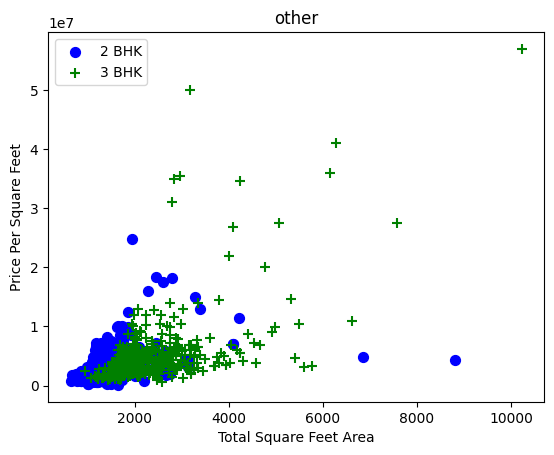

In [36]:

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)] 
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    #matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.squarefeet, bhk2.price,color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.squarefeet, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area") 
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"other")    
    

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.Price_per_sqft),
                'std' : np.std(bhk_df.Price_per_sqft),
                'count' : bhk_df.shape[0]
                
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')
df5 = remove_bhk_outliers(df5)
df5.shape

(3791, 6)

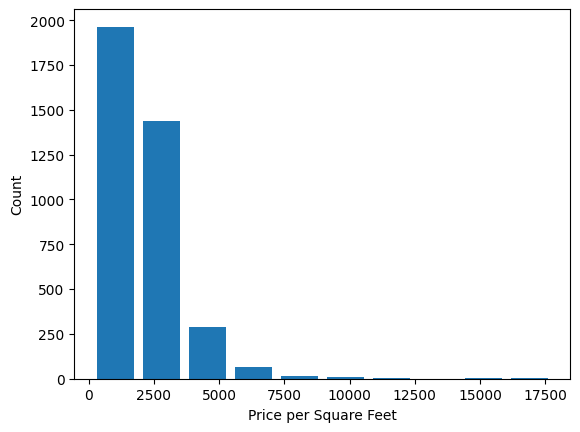

In [38]:
plt.hist(df5.Price_per_sqft, rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")
plt.show()

In [39]:
df5.bathrooms.unique()

array([3, 7, 1, 5, 4, 2, 6, 8, 0])

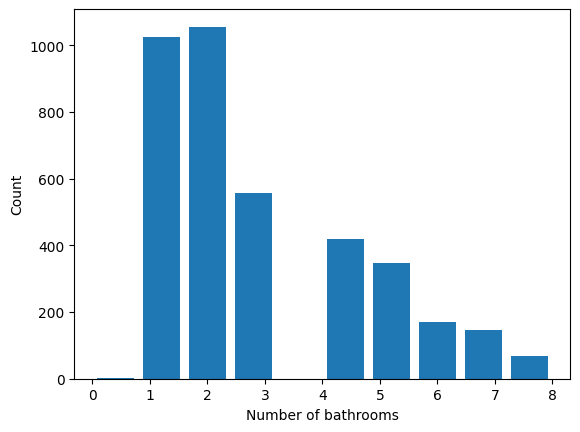

In [40]:
plt.hist(df5.bathrooms, rwidth = 0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

In [41]:
df5[df5.bathrooms>df5.bhk+2]

,location,bathrooms,bhk,price,squarefeet,Price_per_sqft
242,"Sendian, Masaar, Tilal City, Sharjah",6,3,2380000,2300,1034.782609
357,"Murooj Al Furjan West, Al Furjan, Dubai",8,5,7500000,6000,1250.000000
364,"Sendian, Masaar, Tilal City, Sharjah",8,5,4699000,6141,765.184823
477,"Ajman Hills, Al Alia, Ajman",8,4,1330000,1840,722.826087
483,"Ajman Hills, Al Alia, Ajman",8,5,2800000,4500,622.222222
486,"Ajman Hills, Al Alia, Ajman",8,5,2400000,5000,480.000000
562,"District One West Phase I, District One, Moham...",7,4,10900000,6858,1589.384660
606,"Saadiyat Lagoons, Saadiyat Island, Abu Dhabi",8,4,7200000,4964,1450.443191
1060,"District One Villas, District One, Mohammed Bi...",8,5,20200000,6835,2955.376737
1216,"Al Zaheya Gardens, Al Zahya, Ajman",7,3,1300000,3014,431.320504


dataset includes many luxury properties or villas, it might be less unusual to have more bathrooms than BHK+2.

In [42]:
df6 = df5.drop('Price_per_sqft',axis = 'columns')
df6.head()

,location,bathrooms,bhk,price,squarefeet
0,"Binghatti Canal, Business Bay, Dubai",3,2,2500000,1323
1,"La Vie, Jumeirah Beach Residence, Dubai",3,2,7200000,1410
2,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,3600000,2324
3,other,3,2,2999999,1647
4,"Noor Townhouses, Town Square, Dubai",3,3,2449999,2105


One hot encoding(dummies) for the location column

In [43]:
dummies = pd.get_dummies(df6.location)
dummies.head(3)

,"1 Residences, Wasl1, Al Kifaf, Dubai","23 North Townhouse by NED Al Ghurair, Al Furjan, Dubai","AZHA Community, Al Amerah, Ajman","AZIZI Riviera, Meydan One, Meydan, Dubai","Act Towers, Opera District, Downtown Dubai, Dubai","Address Harbour Point Tower 1, Address Harbour Point, Dubai Creek Harbour (The Lagoons), Dubai","Address Harbour Point Tower 2, Address Harbour Point, Dubai Creek Harbour (The Lagoons), Dubai","Address Residences Zabeel, Zabeel 1, Zabeel, Dubai","Ajman Hills, Al Alia, Ajman","Ajman One - Phase 2, Ajman Downtown, Ajman",...,"Verdana, Dubai Investment Park (DIP), Dubai","Vida Residences Creek Beach, Creek Beach, Dubai Creek Harbour (The Lagoons), Dubai","Vida Residences Dubai Mall, Downtown Dubai, Dubai","Vida Residences Dubai Marina, Dubai Marina, Dubai","Violet, Damac Hills 2, Dubai","Waters Edge, Yas Island, Abu Dhabi","Waves Grande, Sobha Hartland, Mohammed Bin Rashid City, Dubai","West Village, Al Furjan, Dubai","il Teatro Residences 1, Naseej District, Aljada, Sharjah",other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df7 = pd.concat([df6,dummies.drop('other', axis ='columns')],axis = 'columns')
df7.head()

,location,bathrooms,bhk,price,squarefeet,"1 Residences, Wasl1, Al Kifaf, Dubai","23 North Townhouse by NED Al Ghurair, Al Furjan, Dubai","AZHA Community, Al Amerah, Ajman","AZIZI Riviera, Meydan One, Meydan, Dubai","Act Towers, Opera District, Downtown Dubai, Dubai",...,"Verdana Residence, Dubai Investment Park (DIP), Dubai","Verdana, Dubai Investment Park (DIP), Dubai","Vida Residences Creek Beach, Creek Beach, Dubai Creek Harbour (The Lagoons), Dubai","Vida Residences Dubai Mall, Downtown Dubai, Dubai","Vida Residences Dubai Marina, Dubai Marina, Dubai","Violet, Damac Hills 2, Dubai","Waters Edge, Yas Island, Abu Dhabi","Waves Grande, Sobha Hartland, Mohammed Bin Rashid City, Dubai","West Village, Al Furjan, Dubai","il Teatro Residences 1, Naseej District, Aljada, Sharjah"
0,"Binghatti Canal, Business Bay, Dubai",3,2,2500000,1323,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"La Vie, Jumeirah Beach Residence, Dubai",3,2,7200000,1410,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,3600000,2324,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,other,3,2,2999999,1647,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Noor Townhouses, Town Square, Dubai",3,3,2449999,2105,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df8 = df7.drop('location',axis = 'columns')
df8.head(3)

,bathrooms,bhk,price,squarefeet,"1 Residences, Wasl1, Al Kifaf, Dubai","23 North Townhouse by NED Al Ghurair, Al Furjan, Dubai","AZHA Community, Al Amerah, Ajman","AZIZI Riviera, Meydan One, Meydan, Dubai","Act Towers, Opera District, Downtown Dubai, Dubai","Address Harbour Point Tower 1, Address Harbour Point, Dubai Creek Harbour (The Lagoons), Dubai",...,"Verdana Residence, Dubai Investment Park (DIP), Dubai","Verdana, Dubai Investment Park (DIP), Dubai","Vida Residences Creek Beach, Creek Beach, Dubai Creek Harbour (The Lagoons), Dubai","Vida Residences Dubai Mall, Downtown Dubai, Dubai","Vida Residences Dubai Marina, Dubai Marina, Dubai","Violet, Damac Hills 2, Dubai","Waters Edge, Yas Island, Abu Dhabi","Waves Grande, Sobha Hartland, Mohammed Bin Rashid City, Dubai","West Village, Al Furjan, Dubai","il Teatro Residences 1, Naseej District, Aljada, Sharjah"
0,3,2,2500000,1323,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,2,7200000,1410,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,4,3600000,2324,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df8.shape

(3791, 201)

In [47]:
x = df8.drop('price',axis = 'columns')
x

,bathrooms,bhk,squarefeet,"1 Residences, Wasl1, Al Kifaf, Dubai","23 North Townhouse by NED Al Ghurair, Al Furjan, Dubai","AZHA Community, Al Amerah, Ajman","AZIZI Riviera, Meydan One, Meydan, Dubai","Act Towers, Opera District, Downtown Dubai, Dubai","Address Harbour Point Tower 1, Address Harbour Point, Dubai Creek Harbour (The Lagoons), Dubai","Address Harbour Point Tower 2, Address Harbour Point, Dubai Creek Harbour (The Lagoons), Dubai",...,"Verdana Residence, Dubai Investment Park (DIP), Dubai","Verdana, Dubai Investment Park (DIP), Dubai","Vida Residences Creek Beach, Creek Beach, Dubai Creek Harbour (The Lagoons), Dubai","Vida Residences Dubai Mall, Downtown Dubai, Dubai","Vida Residences Dubai Marina, Dubai Marina, Dubai","Violet, Damac Hills 2, Dubai","Waters Edge, Yas Island, Abu Dhabi","Waves Grande, Sobha Hartland, Mohammed Bin Rashid City, Dubai","West Village, Al Furjan, Dubai","il Teatro Residences 1, Naseej District, Aljada, Sharjah"
0,3,2,1323,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,2,1410,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,4,2324,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2,1647,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,3,2105,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,2,1,628,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5053,3,2,1268,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5054,2,1,854,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5056,2,2,1300,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
y = df8.price
y

0       2500000
1       7200000
2       3600000
3       2999999
4       2449999
         ...   
5052     570000
5053    2345000
5054    3007888
5056    3800000
5057    4360000
Name: price, Length: 3791, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

In [50]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.804312065667734

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.73755839, 0.74756464, 0.58676851, 0.77155338, 0.76537908])

In [52]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # Remove the 'normalize' parameter
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage (you need to have 'x' and 'y' defined as your features and target)
result = find_best_model_using_gridsearchcv(x, y)
print(result)


               model  best_score  \
0  linear_regression    0.721765   
1              lasso    0.721766   
2      decision_tree    0.559538   

                                         best_params  
0                                                 {}  
1                {'alpha': 2, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'ra...  


In [53]:
x.columns

Index(['bathrooms', 'bhk', 'squarefeet',
       '1 Residences, Wasl1, Al Kifaf, Dubai',
       '23 North Townhouse by NED Al Ghurair, Al Furjan, Dubai',
       'AZHA Community, Al Amerah, Ajman',
       'AZIZI Riviera, Meydan One, Meydan, Dubai',
       'Act Towers, Opera District, Downtown Dubai, Dubai',
       'Address Harbour Point Tower 1, Address Harbour Point, Dubai Creek Harbour (The Lagoons), Dubai',
       'Address Harbour Point Tower 2, Address Harbour Point, Dubai Creek Harbour (The Lagoons), Dubai',
       ...
       'Verdana Residence, Dubai Investment Park (DIP), Dubai',
       'Verdana, Dubai Investment Park (DIP), Dubai',
       'Vida Residences Creek Beach, Creek Beach, Dubai Creek Harbour (The Lagoons), Dubai',
       'Vida Residences Dubai Mall, Downtown Dubai, Dubai',
       'Vida Residences Dubai Marina, Dubai Marina, Dubai',
       'Violet, Damac Hills 2, Dubai', 'Waters Edge, Yas Island, Abu Dhabi',
       'Waves Grande, Sobha Hartland, Mohammed Bin Rashid City, 

In [54]:
x.values

array([[3, 2, 1323, ..., False, False, False],
       [3, 2, 1410, ..., False, False, False],
       [3, 4, 2324, ..., False, False, False],
       ...,
       [2, 1, 854, ..., False, False, False],
       [2, 2, 1300, ..., False, False, False],
       [5, 4, 3685, ..., False, False, False]], dtype=object)

In [55]:
def predict_price(location, squarefeet, bathrooms, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    input_array = np.zeros(len(x.columns))
    input_array[0] = squarefeet
    input_array[1] = bathrooms
    input_array[2] = bhk
    if loc_index >= 0:
        input_array[loc_index] = 1
        
    return lr_clf.predict([input_array])[0]    

In [56]:
int(str(round(abs(predict_price('Binghatti Canal, Business Bay, Dubai', 1323, 3, 2))))[:7])

C:\Users\kesav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2178562

In [58]:
import pickle
with open('UAE_home prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [59]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))